We can use the Poisson distribution to model radiation hit in target cells.
$$P(n)=\frac{\lambda^ne^{-\lambda}}{n!}$$
where $\lambda$ is the average number of events occurred in a unit time and n is the specific number of events occurred in a unit time. 

If each "hit" is assumed to result in cell inactivation, then the probability of survival is the probability of not being hit, P(0).
$$P(0)=\frac{\lambda^0e^{-\lambda}}{0!}=e^{-\lambda}$$
We define a dose $D_0$ that delivers, on average, one lethal event per target. This dose will result in $P(0)=e^{-1}=0.37$ survival. $D_0$ is often called the **mean lethal dose**.

#### Linear-Quadratic Model
The *linear-quadratic* (**L-Q**) equation is the most wildly accepted method of fitting the survival of cells following radiation. It is given by $$S=e^{-(\alpha D+\beta D^{2})}$$
Where S is the number of surviving cells following a dose of D, and $\alpha$ and $\beta$ describe the linear and quadratic parts of the survival curve. The $\alpha$ and $\beta$ constants vary between different tissues and tumors.

#### Multi-Target Model
In a *multi-target* (**M-T**) model, each cell contains n distinct and identical targets and all n targets must be inactivated to kill the cell. The probability that a target is not hit is $e^{-\frac{D}{D_0}}$. The probability that a target is hit is $1-e^{-\frac{D}{D_0}}$. The probability that all n targets are hit is $(1-e^{-\frac{D}{D_0}})^n$. Therefore the probability that all n targets will not be hit, i.e., the probability of survival, is $$S=1-(1-e^{-\frac{D}{D_0}})^n$$

Here this clonogenic assay shows the survival of FaDu cells following radiation and we are going to fit the dose response curve to the L-Q and M-T models.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
%matplotlib inline

In [103]:
data={'radiation':[0,2,4,6,8], 'surviving.fraction': [0.992063492,0.523809524,0.170634921,0.037037037,0.005291005],
      'sd': [0.297253744,0.153566814,0.085736329,0.00819679,0.00819679]}
df = pd.DataFrame(data)
df

,radiation,surviving.fraction,sd
0,0,0.992063,0.297254
1,2,0.523810,0.153567
2,4,0.170635,0.085736
3,6,0.037037,0.008197
4,8,0.005291,0.008197


Text(0, 0.5, 'Surviving fraction')

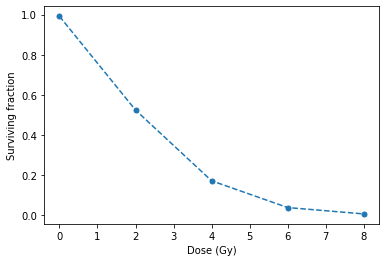

In [131]:
plt.plot(df['radiation'], df['surviving.fraction'], ls = '--', marker = 'o', markersize = 5)
plt.xlabel("Dose (Gy)")
plt.ylabel("Surviving fraction")

In [119]:
# Fit data to L-Q model
def lq(d, a, b):
    return math.e**(-a*d-b*d*d)
param1, param_cov1 = curve_fit(lq, df['radiation'], df['surviving.fraction'])
a, b = param1

# Fit data to M-T model
def mt(d, d0, n):
    return 1-(1-math.e**(-d/d0))**n
param2, param_cov2 = curve_fit(mt, df['radiation'], df['surviving.fraction'])
d0, n = param2

# define a sequence of inputs between the smallest and largest known inputs
x_dose = np.arange(0,8,0.1)
# calculate the output for the range
y_lq = lq(x_dose, a, b)
y_mt = mt(x_dose, d0, n)

Text(0, 0.5, 'Surviving fraction')

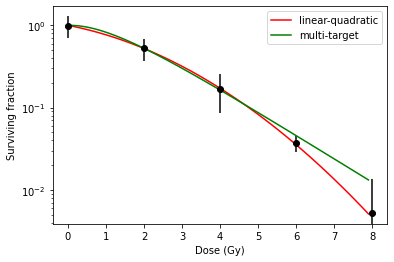

In [133]:
plt.errorbar(df['radiation'], df['surviving.fraction'], yerr = df['sd'], color = 'black', 
              fmt='o') # 'o' means only showing data point, no line (as opposed to '-o')
plt.plot(x_dose, y_lq, color = 'red', label = 'linear-quadratic')
plt.plot(x_dose, y_mt, color = 'green', label = 'multi-target')
plt.yscale('log')
plt.legend()
plt.xlabel("Dose (Gy)")
plt.ylabel("Surviving fraction")